Take the results of synthetic_classes.py. Plot the histograms of error values of the training and test classes to evaluate the interclass separation and hence the performance of the algorithm.

In [5]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import segment_cluster as sc
import importlib
importlib.reload(sc)
np.random.seed(0)
from scipy.stats import zscore
import time


In [106]:
#load the validation results and the hyperparameter values used; order/indexing of values matters
results_file="new_20190617_2comparenocopy.csv"
k_clusters=[10, 50, 100, 200]
seg_lens=[10, 50, 100,150,200]

#"normal"/training lightcurves
rho_file=np.loadtxt("data/synthetic_rhos_v2.csv", delimiter=',')
#"outlier"/test lightcurves
outlier_file="data/flats.csv"

sine_file=np.loadtxt(outlier_file, delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))),test_size=0.25, random_state=0)

#create a directory for the plots
results_dir=os.getcwd()+"/"+results_file.split(".")[0]
os.system("mkdir {}".format(results_dir))

0

In [129]:
import segment_cluster as sc
importlib.reload(sc)

process_t0 = time.process_time()
real_t0 = time.time()

all_train_segments=[]
for rho in rho_file:
    train_segments=sc.segmentation(rho, 200, 1, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
print(np.shape(all_train_segments))
print("Finished, elapsed time: {}s".format(time.time() - real_t0)+", total CPU time: {}s".format(time.process_time()-process_t0))

(301000, 200)
Finished, elapsed time: 0.8057646751403809s, total CPU time: 0.8060058070004743s


In [130]:
import segment_cluster_scaled as sc
importlib.reload(sc)

process_t0 = time.process_time()
real_t0 = time.time()

all_train_segments=[]
for rho in rho_file:
    train_segments=sc.segmentation(rho, 200, 1, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
print(np.shape(all_train_segments))

print("Finished, elapsed time: {}s".format(time.time() - real_t0)+", total CPU time: {}s".format(time.process_time()-process_t0))

(300000, 200)
Finished, elapsed time: 1.7316761016845703s, total CPU time: 1.734381129999747s


In [97]:
counts1 = sc.analyse("new_20190617.csv", k_clusters, seg_lens, save_histograms=True, save_grid=True)


In [100]:
counts1[1]

array([[  0.,  10.,  50., 100., 150., 200.],
       [ 10., 109.,  65., 209., 203., 229.],
       [ 50., 148.,   6.,  98., 174., 228.],
       [100.,  94.,   2.,  36., 129., 209.],
       [200.,  38.,   1.,  19.,  96., 201.]])

In [94]:
counts = sc.analyse("new_20190617_2comparenocopy.csv", k_clusters, seg_lens, save_histograms=True, save_grid=True)


array([[  0.,  10.,  50., 100., 150., 200.],
       [ 10., 201., 228., 203., 232., 232.],
       [ 50., 231., 198., 212., 250., 249.],
       [100., 233.,  18., 248., 202., 232.],
       [200., 215.,   9.,  90., 233., 245.]])

In [99]:
counts[1]

array([[  0.,  10.,  50., 100., 150., 200.],
       [ 10., 121.,  54., 206., 219., 182.],
       [ 50., 171.,   6., 121., 181., 213.],
       [100., 122.,   1.,  26., 139., 227.],
       [200.,  99.,   1.,  26.,  90., 168.]])

no. clusters:  10 segment length:  10
Mean rho error: 	 0.14045963970315495 Max rho error:  0.5173103749976236


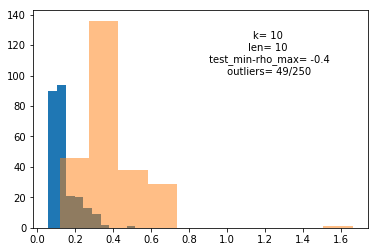

Mean test error: 	 0.37700001476562767
Min test-max rho error:  -0.39889218481586436
no. misclassified observations:  201

no. clusters:  10 segment length:  50
Mean rho error: 	 0.38926782910678664 Max rho error:  1.2841572048082806


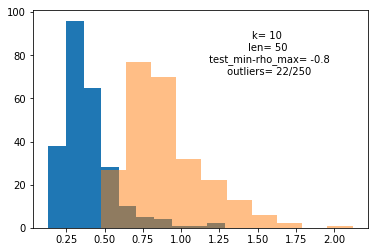

Mean test error: 	 0.8983748737593491
Min test-max rho error:  -0.8110725767963727
no. misclassified observations:  228

no. clusters:  10 segment length:  100
Mean rho error: 	 0.8437646333704829 Max rho error:  1.8635057348416622


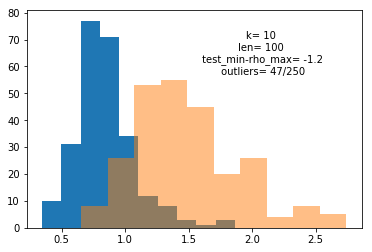

Mean test error: 	 1.4869176392072614
Min test-max rho error:  -1.2083666581935129
no. misclassified observations:  203

no. clusters:  10 segment length:  150
Mean rho error: 	 1.1594117826236703 Max rho error:  2.3960313815099377


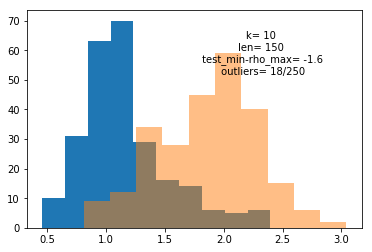

Mean test error: 	 1.8589089873712874
Min test-max rho error:  -1.5889934504452432
no. misclassified observations:  232

no. clusters:  10 segment length:  200
Mean rho error: 	 1.2979228283534519 Max rho error:  2.7466587336974326


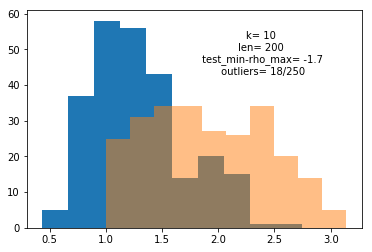

Mean test error: 	 1.911568973222131
Min test-max rho error:  -1.74091647948497
no. misclassified observations:  232

no. clusters:  50 segment length:  10
Mean rho error: 	 0.05389438925340838 Max rho error:  0.326636935544368


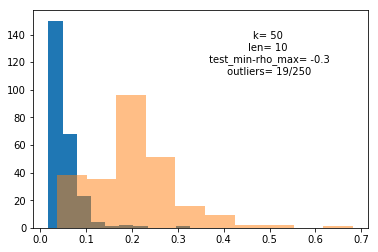

Mean test error: 	 0.20421765850727427
Min test-max rho error:  -0.2890641256287117
no. misclassified observations:  231

no. clusters:  50 segment length:  50
Mean rho error: 	 0.18409009338394813 Max rho error:  0.8260417500827609


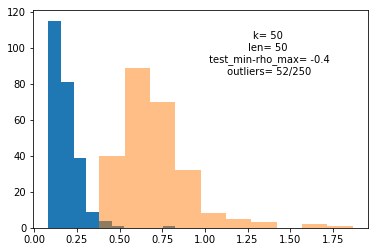

Mean test error: 	 0.7113057983160526
Min test-max rho error:  -0.44430815893482134
no. misclassified observations:  198

no. clusters:  50 segment length:  100
Mean rho error: 	 0.4498575091330615 Max rho error:  1.2070309368067456


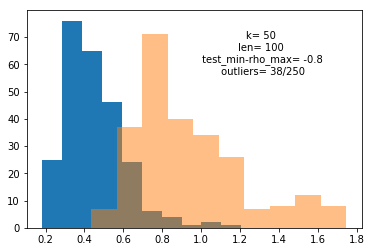

Mean test error: 	 0.9341766282770829
Min test-max rho error:  -0.77268912704303
no. misclassified observations:  212

no. clusters:  50 segment length:  150
Mean rho error: 	 0.6382537271886938 Max rho error:  2.5449072120689857


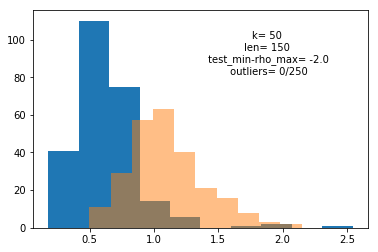

Mean test error: 	 1.104770411986896
Min test-max rho error:  -2.04599760909141
no. misclassified observations:  250

no. clusters:  50 segment length:  200
Mean rho error: 	 0.7522595274128775 Max rho error:  2.3417451885454166


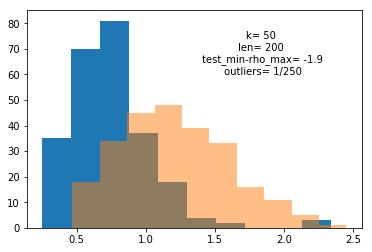

Mean test error: 	 1.2064337848003825
Min test-max rho error:  -1.8738335685224385
no. misclassified observations:  249

no. clusters:  100 segment length:  10
Mean rho error: 	 0.036953827392465895 Max rho error:  0.28896198525952677


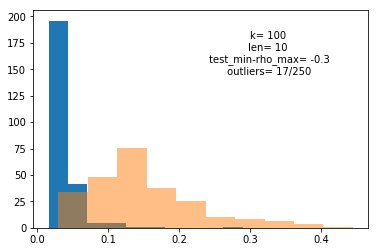

Mean test error: 	 0.14970788719889175
Min test-max rho error:  -0.25963097986017886
no. misclassified observations:  233

no. clusters:  100 segment length:  50
Mean rho error: 	 0.14225943807734875 Max rho error:  0.45495839047456593


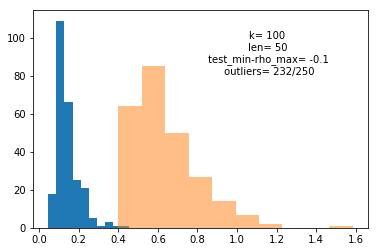

Mean test error: 	 0.635490339748832
Min test-max rho error:  -0.054347821331771906
no. misclassified observations:  18

no. clusters:  100 segment length:  100
Mean rho error: 	 0.33629675484655636 Max rho error:  1.2593995628069636


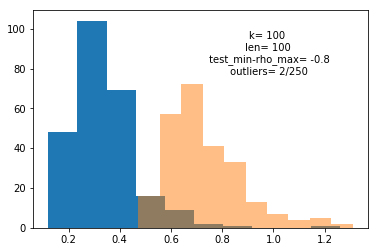

Mean test error: 	 0.7321625039894061
Min test-max rho error:  -0.786638132089001
no. misclassified observations:  248

no. clusters:  100 segment length:  150
Mean rho error: 	 0.49864327254410035 Max rho error:  1.2650229117959322


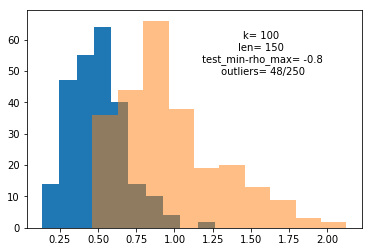

Mean test error: 	 0.9774086428124861
Min test-max rho error:  -0.8020331815122488
no. misclassified observations:  202

no. clusters:  100 segment length:  200
Mean rho error: 	 0.5790570676333288 Max rho error:  1.569619798018002


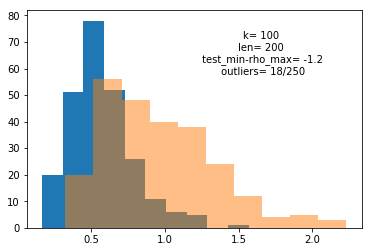

Mean test error: 	 0.9652001249193907
Min test-max rho error:  -1.245009118474412
no. misclassified observations:  232

no. clusters:  200 segment length:  10
Mean rho error: 	 0.02522825621785101 Max rho error:  0.21833630510529017


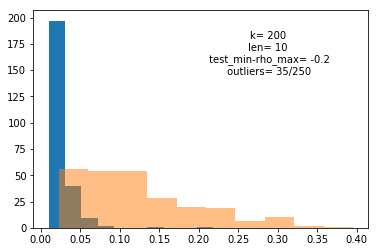

Mean test error: 	 0.12530209778743956
Min test-max rho error:  -0.19512317129956255
no. misclassified observations:  215

no. clusters:  200 segment length:  50
Mean rho error: 	 0.1165978528325783 Max rho error:  0.3950959429337272


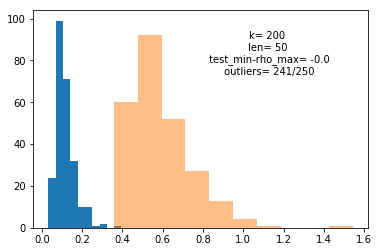

Mean test error: 	 0.5882520216514335
Min test-max rho error:  -0.03841932140456994
no. misclassified observations:  9

no. clusters:  200 segment length:  100
Mean rho error: 	 0.2523059970336498 Max rho error:  0.5987266576268719


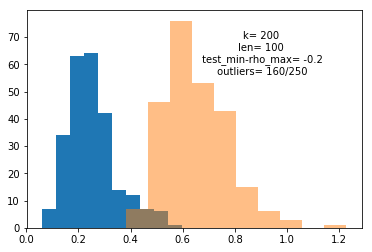

Mean test error: 	 0.6514993050692444
Min test-max rho error:  -0.2161377244303876
no. misclassified observations:  90

no. clusters:  200 segment length:  150
Mean rho error: 	 0.3929272018903359 Max rho error:  1.0904630944643408


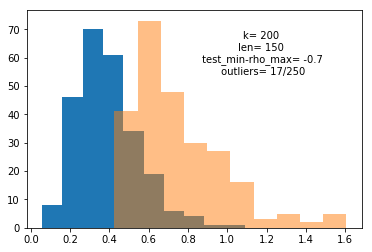

Mean test error: 	 0.7523901239063281
Min test-max rho error:  -0.6650955040150104
no. misclassified observations:  233

no. clusters:  200 segment length:  200
Mean rho error: 	 0.46603299194730335 Max rho error:  1.4329256271373514


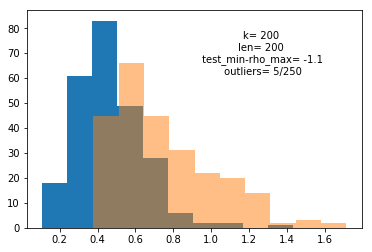

Mean test error: 	 0.7503296123687735
Min test-max rho error:  -1.0556097828269928
no. misclassified observations:  245



In [89]:
#draw histograms of the error values of training and test light curve reconstructions, for the different sets of hyperparameters.
#Larger separation between the blue and orange histograms means a better functioning algorithm.
results=np.loadtxt(results_file, dtype=float, delimiter=",")
outliers=np.zeros((len(k_clusters)+1,len(seg_lens)+1))
outliers[1:,0]=np.array(k_clusters).T
outliers[0,1:]=np.array(seg_lens)
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
#         plt.xlim([0,2.5])
#         plt.ylim([0,100])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.savefig("{}.png".format(results_dir+"/"+"k{}_len{}".format(k_cluster, seg_len)))
        plt.show()
        outliers[k_id+1,len_id+1]=250-counter
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        print()
np.savetxt("{}/grid_search.csv".format(results_dir), outliers.astype(int), delimiter=",") 

In [90]:
outliers.astype(int)

array([[  0,  10,  50, 100, 150, 200],
       [ 10,  49,  22,  47,  18,  18],
       [ 50,  19,  52,  38,   0,   1],
       [100,  17, 232,   2,  48,  18],
       [200,  35, 241, 160,  17,   5]])

Take the results of synthetic_classes.py. Extract the indices of X best/worst reconstructions of training and test classes to understand how to improve the algorithm; how to error of reconstruction of the different classes more different. 

In [40]:
results=np.loadtxt(results_file, dtype=float, delimiter=",")
#structure of the lines in the file: cluster number index, segment length index, training=0 test=1, lightcurve index, error)

extract_x=3

output=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        output.append(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        output.append("worst/best training, wort/best test")
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        sorted_train=train[train[:,-1].argsort()]
        worst_train=sorted_train[-extract_x:,3].astype(int)
        best_train=sorted_train[0:extract_x,3].astype(int)        
        
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        sorted_test=test[test[:,-1].argsort()]
        worst_test=sorted_test[-extract_x:,3].astype(int)
        best_test=sorted_test[0:extract_x,3].astype(int)
        output.append(np.vstack((worst_train,best_train,worst_test,best_test)))

In [41]:
output

[('no. clusters: ', 10, 'segment length: ', 10),
 'worst/best training, wort/best test',
 array([[523, 418, 299],
        [996, 693, 200],
        [144,  14, 101],
        [185, 104, 147]]),
 ('no. clusters: ', 10, 'segment length: ', 50),
 'worst/best training, wort/best test',
 array([[255, 826, 494],
        [583, 996, 496],
        [110, 184, 144],
        [147,  84, 232]]),
 ('no. clusters: ', 10, 'segment length: ', 100),
 'worst/best training, wort/best test',
 array([[494, 576, 790],
        [500, 654, 817],
        [ 77, 156, 216],
        [185, 136, 128]]),
 ('no. clusters: ', 10, 'segment length: ', 150),
 'worst/best training, wort/best test',
 array([[ 18, 494, 364],
        [989, 362, 736],
        [ 55,  77,  30],
        [127, 104,  85]]),
 ('no. clusters: ', 10, 'segment length: ', 200),
 'worst/best training, wort/best test',
 array([[940, 826, 351],
        [883, 989, 283],
        [198,  58,   4],
        [ 14,   6, 123]]),
 ('no. clusters: ', 50, 'segment length: '

take the ids of the best and worst reconstructions, repeat and plot 

('no. clusters: ', 10, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


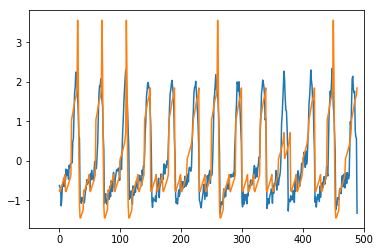

0.35488241431862316


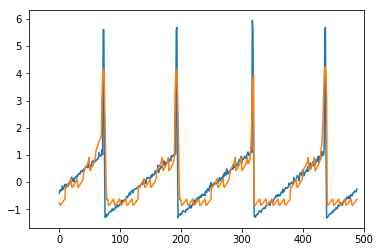

0.37674389330595576


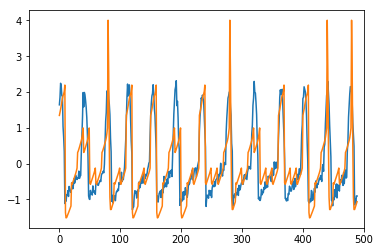

0.5079036842969172
Best reconstructions of outlier lightcurves


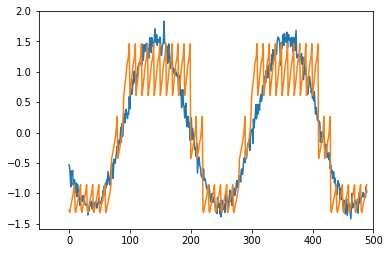

0.17219811903155088


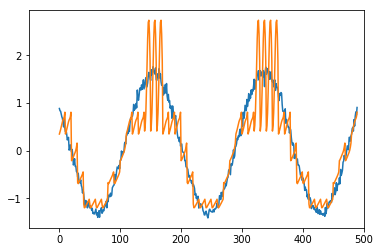

0.1879982364058784


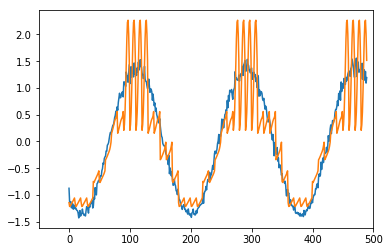

0.20059048197287682
('no. clusters: ', 10, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


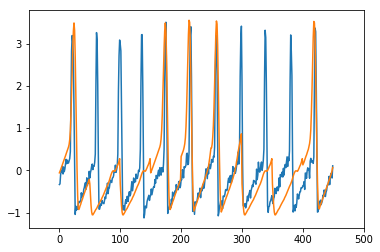

0.9855800017088823


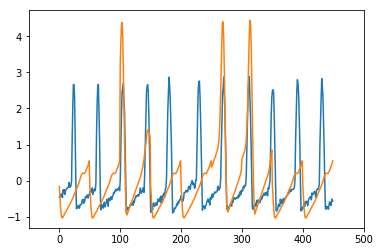

1.1060321901873365


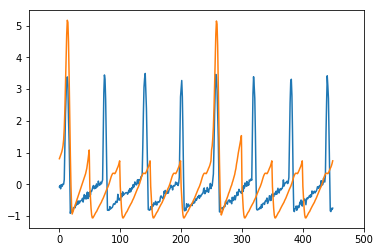

1.1413860673189165
Best reconstructions of outlier lightcurves


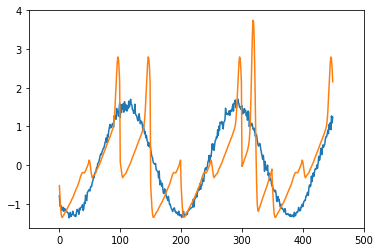

0.7239586969843317


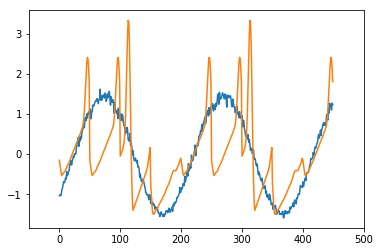

0.7978887042192019


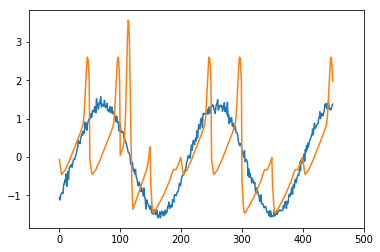

0.7994046785520439
('no. clusters: ', 10, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


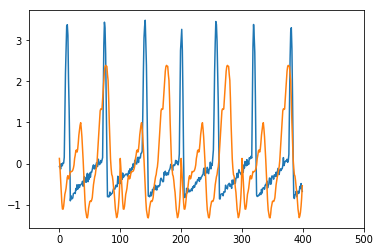

1.8517460485848596


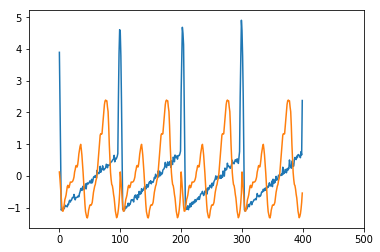

1.940541586345336


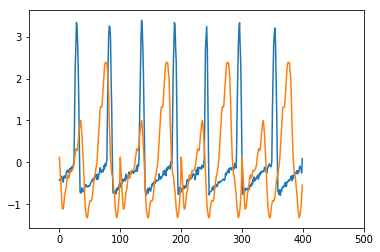

2.0021722829781172
Best reconstructions of outlier lightcurves


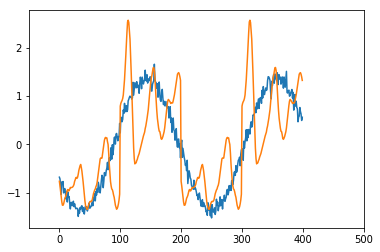

0.6689539891275069


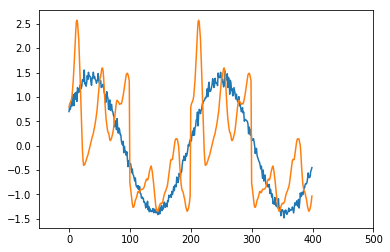

0.6861973995955546


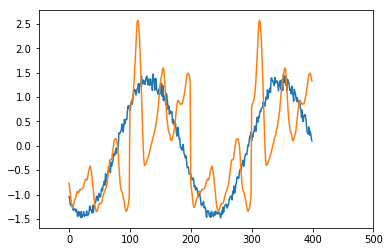

0.7275506392194118
('no. clusters: ', 10, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


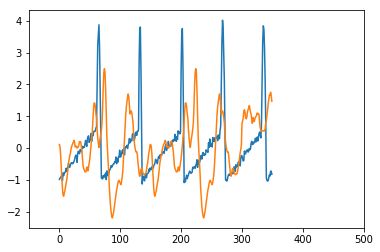

1.7656050470222937


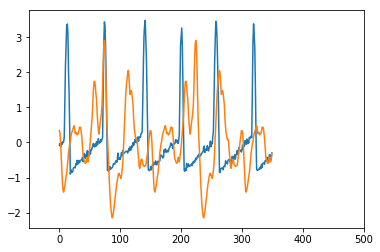

1.8680396874095355


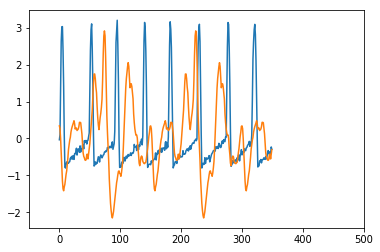

2.0939659601118468
Best reconstructions of outlier lightcurves


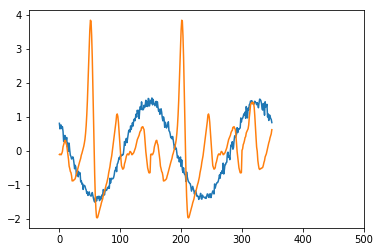

1.7860781698713344


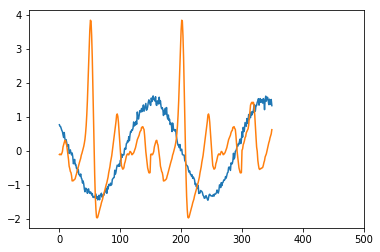

1.8258965567892262


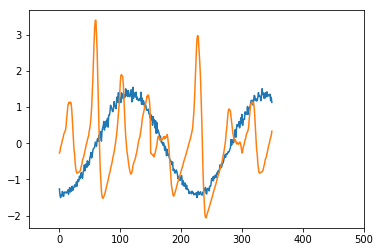

1.8295186458693917
('no. clusters: ', 10, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


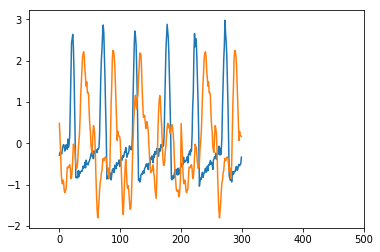

2.342426809574027


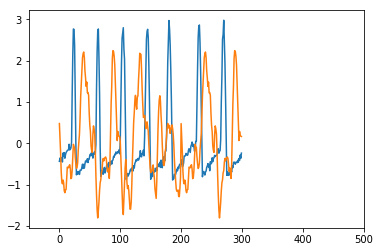

2.390155327152119


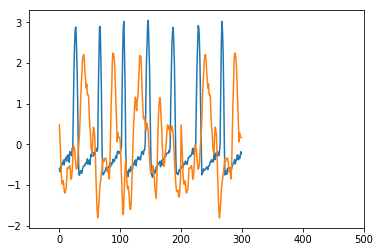

2.410936128765238
Best reconstructions of outlier lightcurves


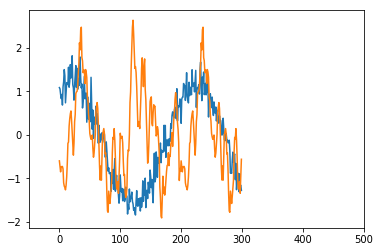

1.6791095320888785


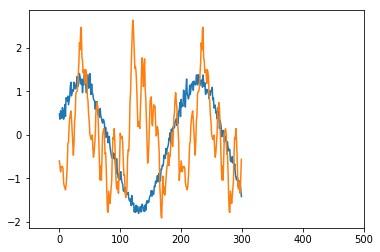

1.697580659410312


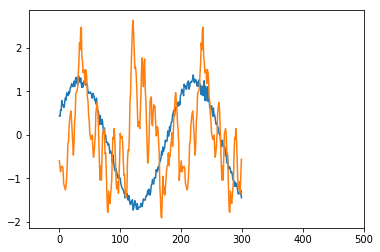

1.6996761718306166
('no. clusters: ', 50, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


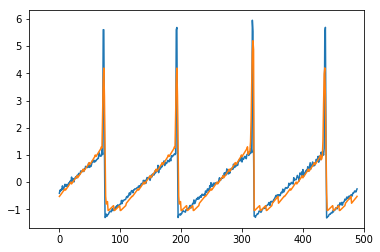

0.18902270517261244


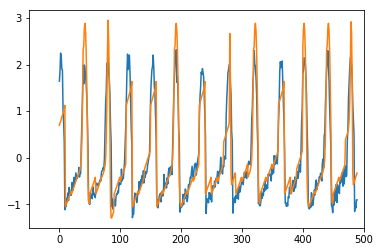

0.2155342997714084


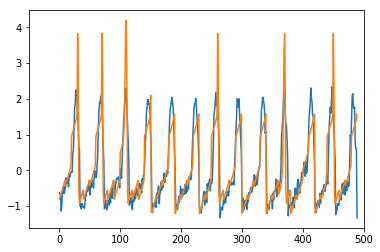

0.32974535197953353
Best reconstructions of outlier lightcurves


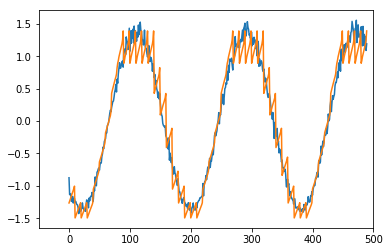

0.045003868207214


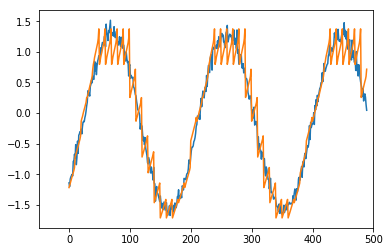

0.04860260618262489


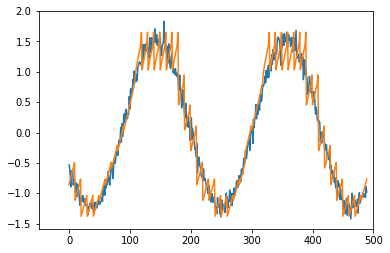

0.04963007511807402
('no. clusters: ', 50, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


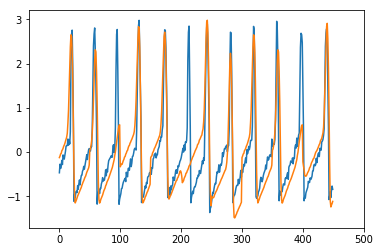

0.43844665073514205


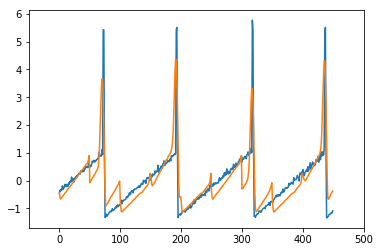

0.46703052964067465


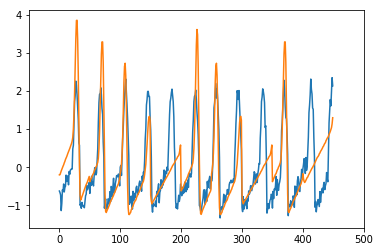

0.6166389138024562
Best reconstructions of outlier lightcurves


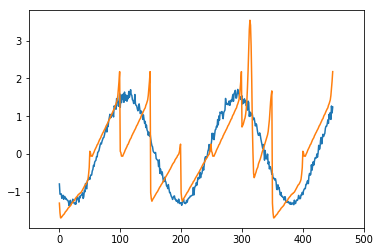

0.47271528206995317


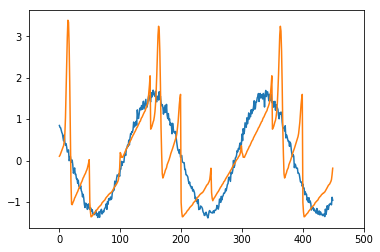

0.4935140180922569


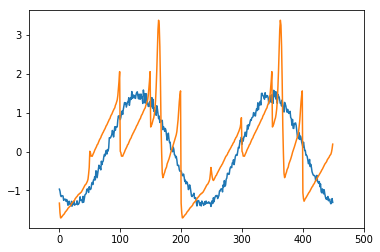

0.5721517827345226
('no. clusters: ', 50, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


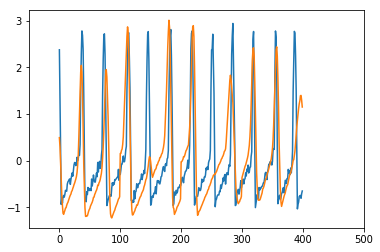

0.8743614166610957


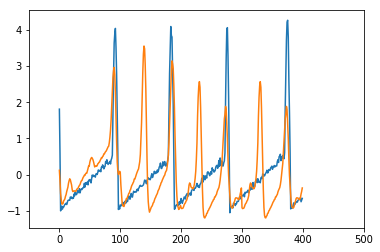

0.9177770376969662


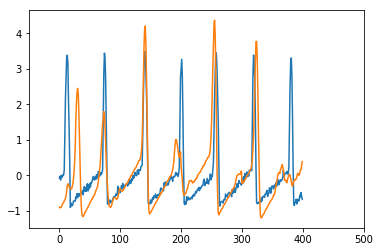

1.0575838184748023
Best reconstructions of outlier lightcurves


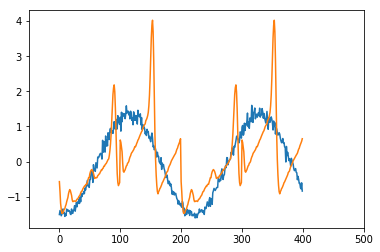

0.8094230903331814


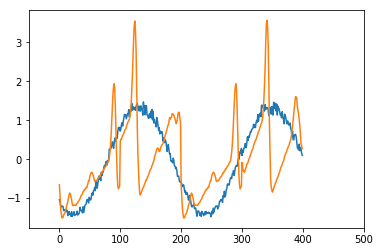

0.8646082078871177


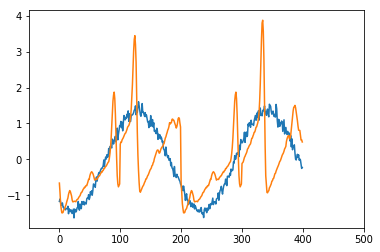

0.8882127818106857
('no. clusters: ', 50, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


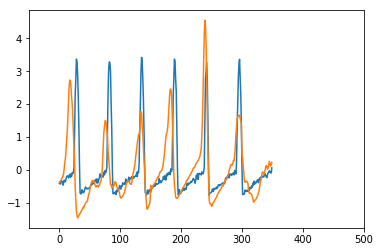

1.3035959897410683


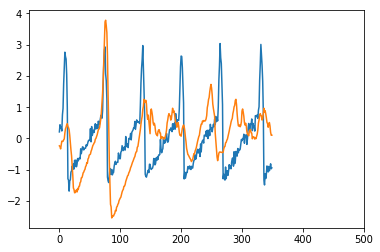

1.339324439470279


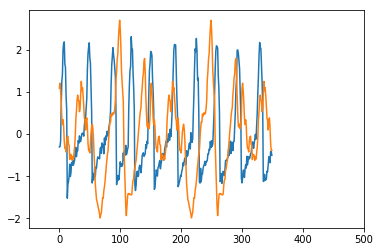

2.0466964438041355
Best reconstructions of outlier lightcurves


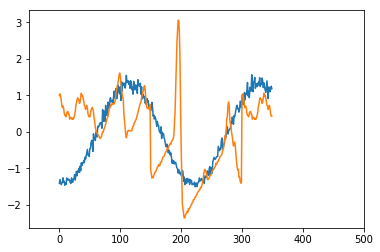

1.2197176563886676


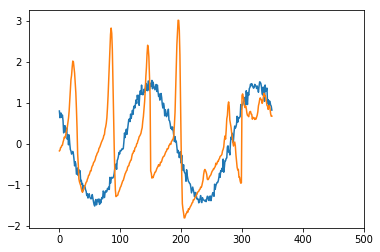

1.2557164217237018


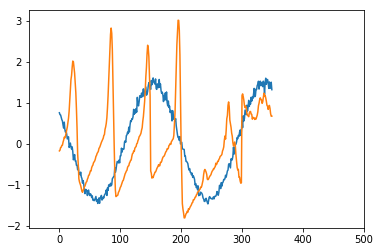

1.299241701843604
('no. clusters: ', 50, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


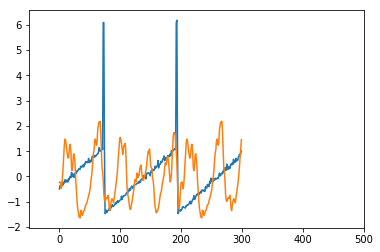

1.79048250210553


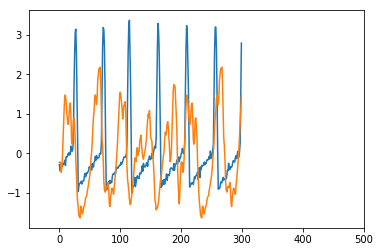

1.9253973005035951


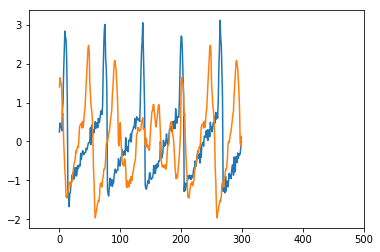

2.2079217403721487
Best reconstructions of outlier lightcurves


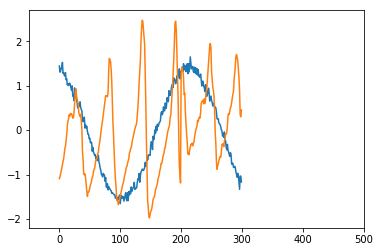

1.7488572529458877


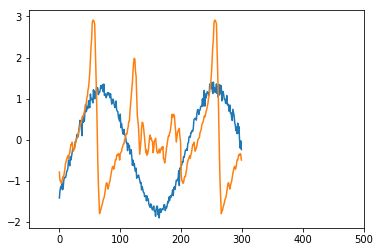

1.821758345437997


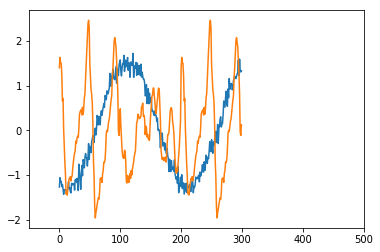

1.8261712275242772
('no. clusters: ', 100, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


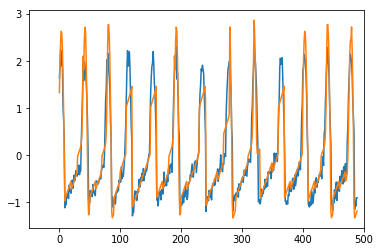

0.1475411970268821


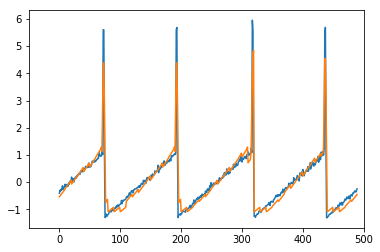

0.15005620691812965


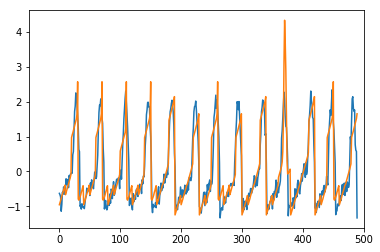

0.333413425966703
Best reconstructions of outlier lightcurves


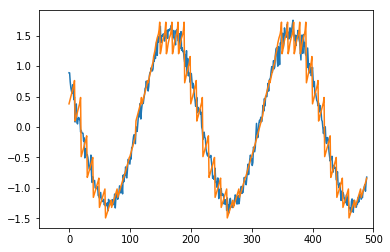

0.03628244074172688


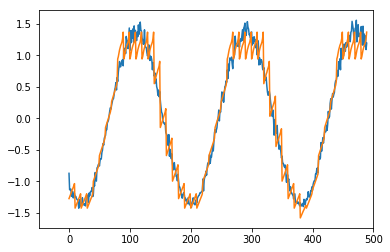

0.037469057457127364


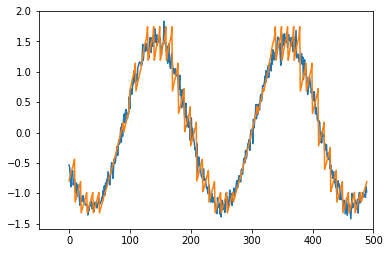

0.038084208609361146
('no. clusters: ', 100, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


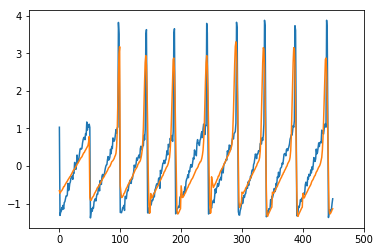

0.3757061284346714


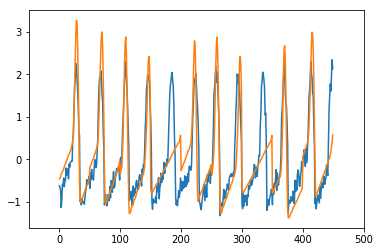

0.43123546859561973


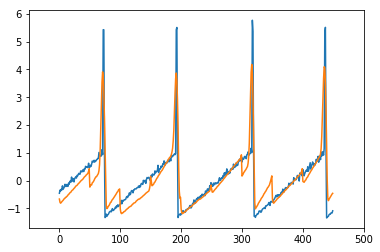

0.4392430741019278
Best reconstructions of outlier lightcurves


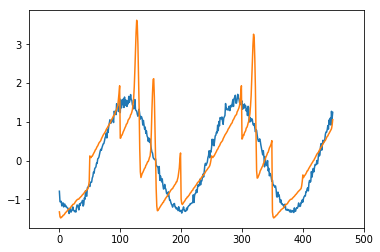

0.35410379602663766


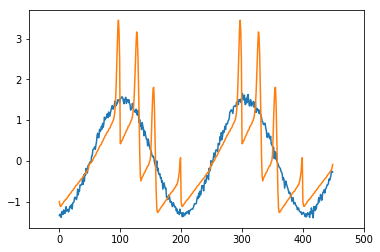

0.4296078121087428


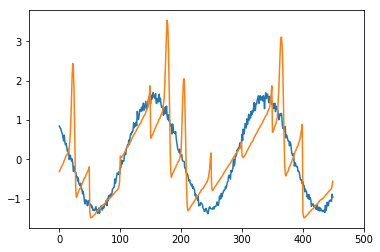

0.446503077141496
('no. clusters: ', 100, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


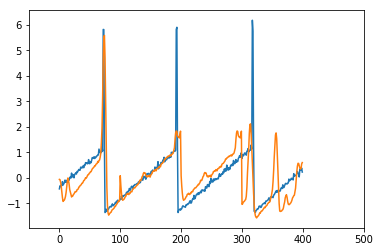

0.8809405367344965


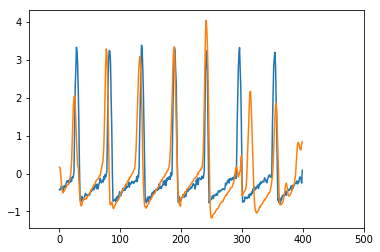

0.8936747675286947


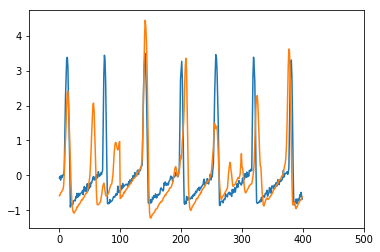

0.9883520347407658
Best reconstructions of outlier lightcurves


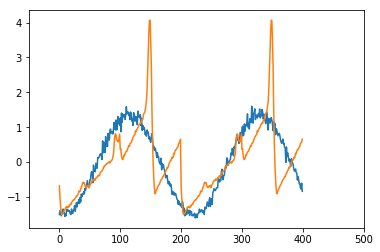

0.6437088108800063


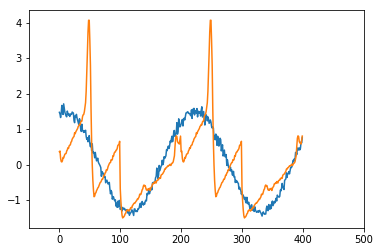

0.6631323693936122


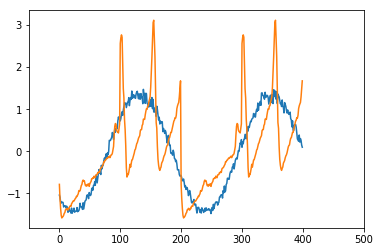

0.6712579496556675
('no. clusters: ', 100, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


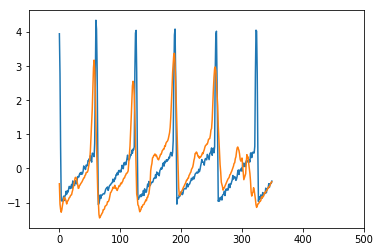

0.9962094296037388


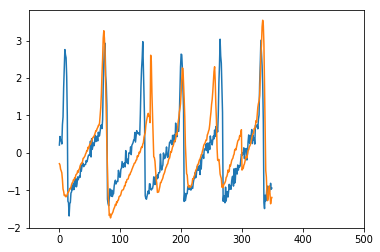

1.0692615196442057


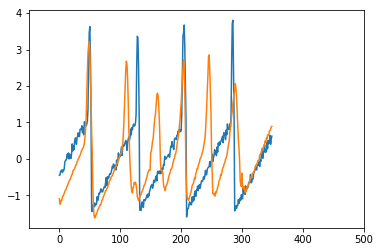

1.0897275891559701
Best reconstructions of outlier lightcurves


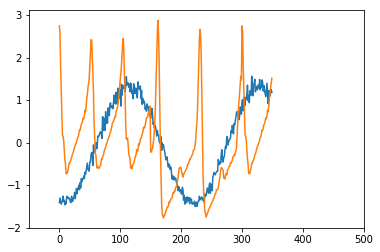

1.4866600992435945


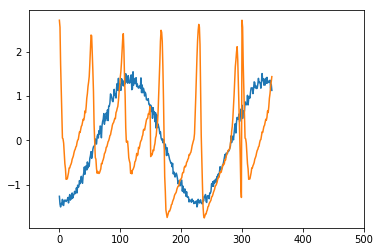

1.5565948379978856


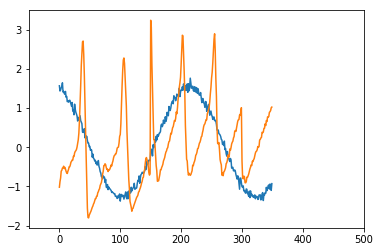

1.589644087884419
('no. clusters: ', 100, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


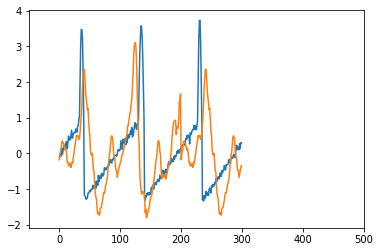

1.6182133619169887


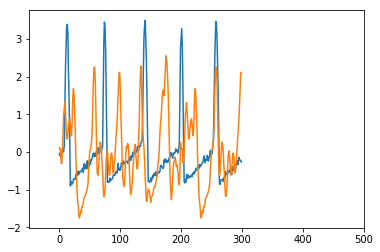

1.7926237660593343


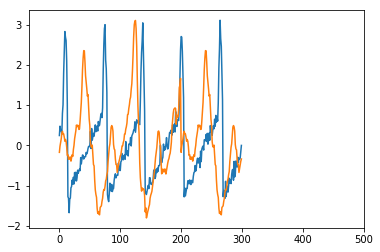

2.077420315878005
Best reconstructions of outlier lightcurves


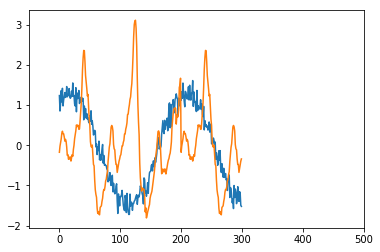

1.6287187941069226


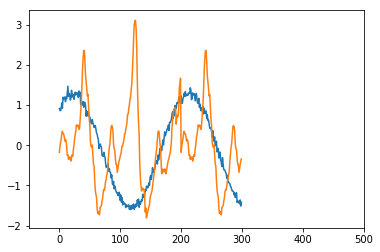

1.632296559021612


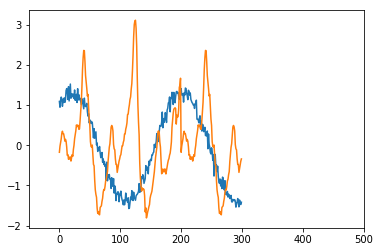

1.63408790213373
('no. clusters: ', 200, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


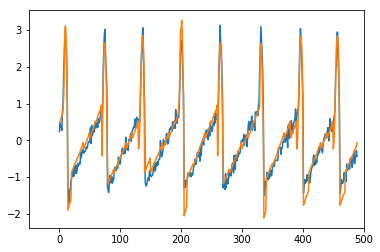

0.08345806151891326


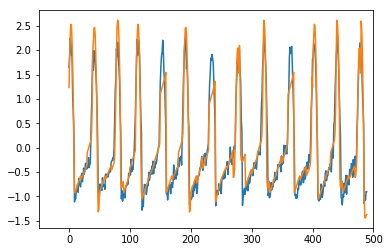

0.11497663661524056


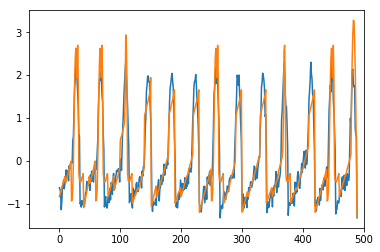

0.22338464542947906
Best reconstructions of outlier lightcurves


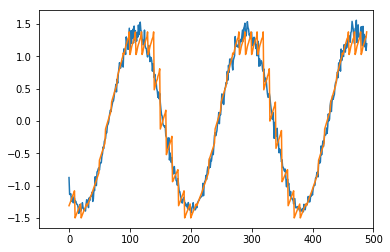

0.027024318919969103


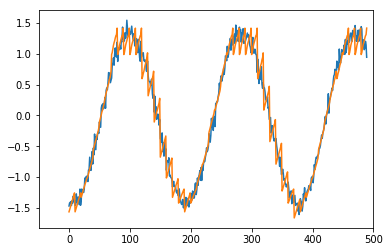

0.030441200225117267


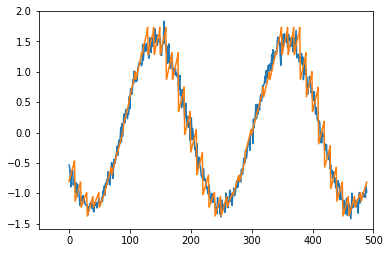

0.03184783318548629
('no. clusters: ', 200, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


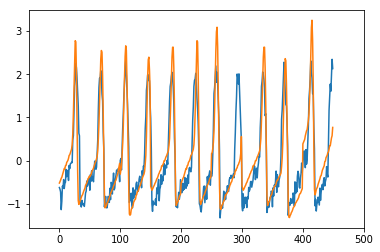

0.29702862076035774


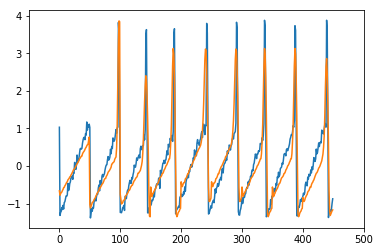

0.35264605245457226


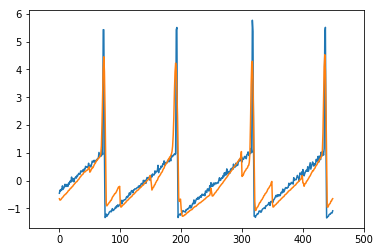

0.3540305954460919
Best reconstructions of outlier lightcurves


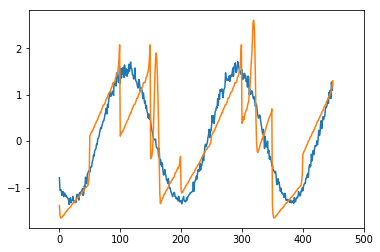

0.3123783368197741


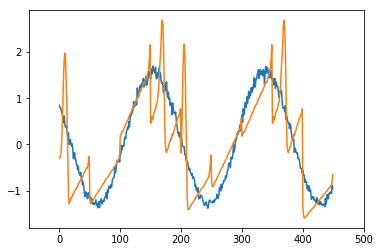

0.3608596291011333


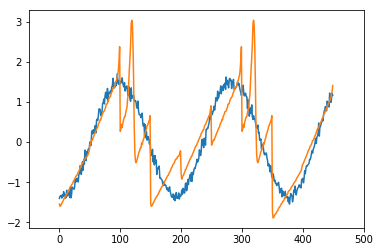

0.3707403449673786
('no. clusters: ', 200, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


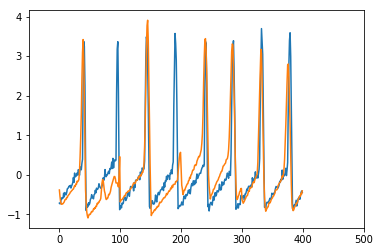

0.6055052202183382


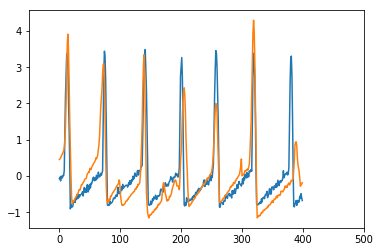

0.6246312131466781


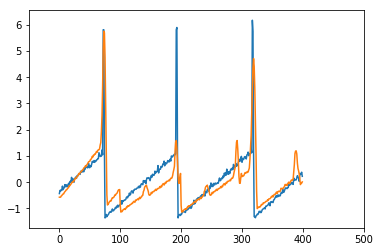

0.7523862676386759
Best reconstructions of outlier lightcurves


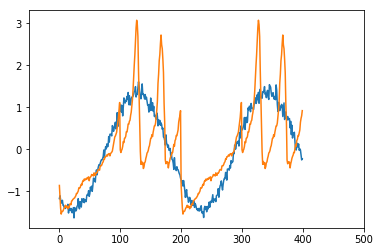

0.5747001572300676


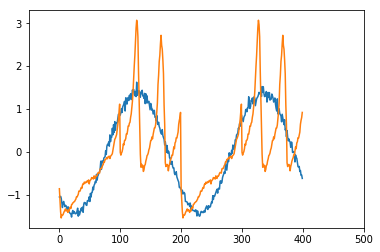

0.5925791227092467


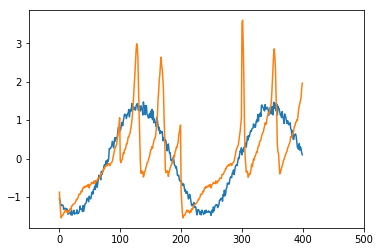

0.6013710156105746
('no. clusters: ', 200, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


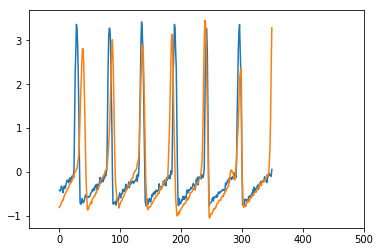

0.9270392877975587


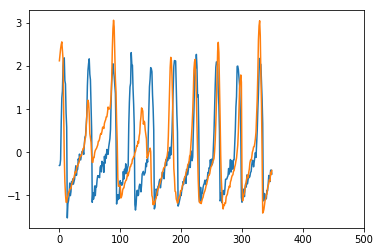

0.946193686847363


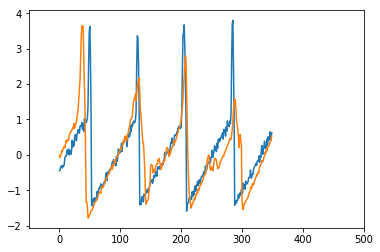

1.0133562789788717
Best reconstructions of outlier lightcurves


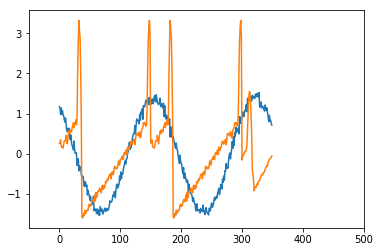

1.0823656265127695


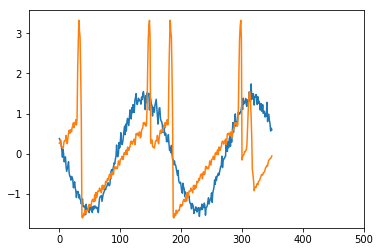

1.1095651534470679


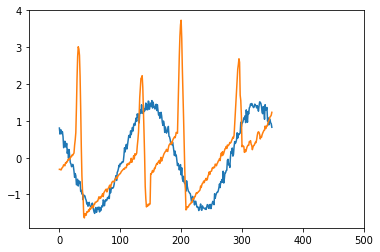

1.161809789149017
('no. clusters: ', 200, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


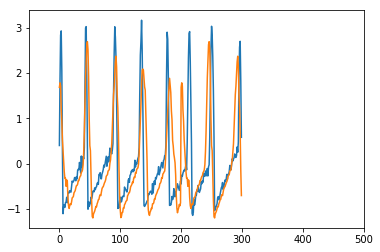

1.0789250862578887


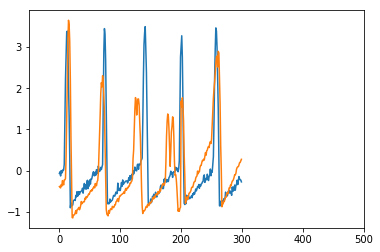

1.0793110237635728


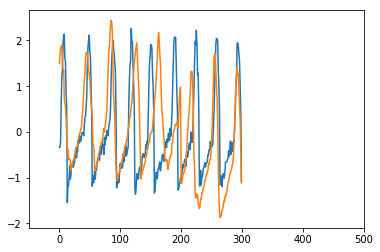

1.2859426255540953
Best reconstructions of outlier lightcurves


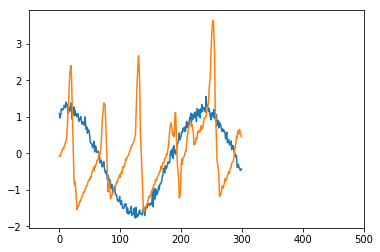

1.4779230371713834


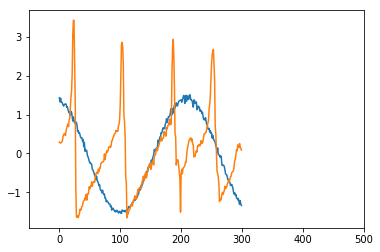

1.5029868376585618


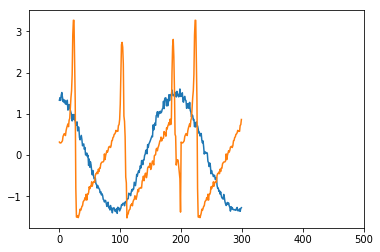

1.5848475440693734


In [44]:
plot_worst_training=True
plot_best_training=False
plot_worst_test=False
plot_best_test=True

hyperparameter_set=0
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)
        
        ids=output[int((hyperparameter_set+1)*3 -1)]
        def plot_reco(lc):
            valid_segments= sc.segmentation(lc, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, lc, cluster, rel_offset=False, seg_slide=seg_len)

            reco[0:-seg_len]=zscore(reco[0:-seg_len])
            lc_expected=zscore(np.copy((lc[0:-seg_len])))

#             lc_error=np.power(np.e,np.log(lc_expected)*0.5+1.0397207708265923)
            error = np.mean(((reco[0:-seg_len]-lc_expected))**2.0)
        
            plt.plot(lc_expected)
            plt.plot(reco[0:-seg_len])
#             plt.ylim([0,14000])
            plt.xlim([-50,500])
            plt.show()
            print(error)
            return
        
        if plot_worst_training is True:
            print("Worst reconstructions of ordinary lightcurves")
            for lc_id in ids[0]:
                lc=rho_file[lc_id]
                plot_reco(lc)
        
        if plot_best_training is True:
            print("Best reconstructions of ordinary lightcurves")
            for lc_id in ids[1]:
                lc=rho_file[lc_id]
                plot_reco(lc)
        if plot_worst_test is True:
            print("Worst reconstructions of outlier lightcurves")
            for lc_id in ids[2]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        if plot_best_test is True:
            print("Best reconstructions of outlier lightcurves")
            for lc_id in ids[3]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        
        hyperparameter_set+=1

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import segment_cluster as sc

ordinary_file = np.loadtxt("data/synthetic_rhos_v2.csv", delimiter=',')
outlier_file = np.loadtxt("data/synthetic_boxes.csv", delimiter=',')

In [3]:
all_train_segments=[]
for time_series in ordinary_file[0:150]:
    train_segments=sc.segmentation(time_series, 
                                seg_len=50, 
                                stride=1,
                                time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)

In [4]:
all_valid_segments=[]
for time_series in ordinary_file[150:300]:
    valid_segments=sc.segmentation(time_series, 
                                seg_len=50, 
                                stride=1,
                                time_stamps=False)
    all_valid_segments.append(valid_segments)
all_valid_segments=np.vstack(all_valid_segments)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=100)

In [ ]:
KNR.kneighbors( X=None, n_neighbors=None, return_distance=True)

In [20]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(all_train_segments) 


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [44]:
distances = []
for segment in all_train_segments:
    neighbours = neigh.kneighbors(X=segment.reshape(1, -1), n_neighbors=2, return_distance=True)[0][0][-1]
    distances.append(neighbours)

2829.1715416434618

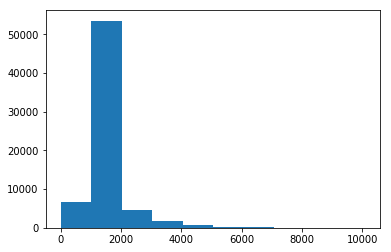

In [58]:
import matplotlib.pyplot as plt
plt.hist(np.array(distances))
np.percentile(np.array(distances),95)

In [1]:
all_valid_segments=[]
for time_series in ordinary_file[150:300]:
    valid_segments=sc.segmentation(time_series, 
                                seg_len=50, 
                                stride=1,
                                time_stamps=False)
    all_valid_segments.append(valid_segments)
all_valid_segments=np.vstack(all_valid_segments)

NameError: name 'ordinary_file' is not defined

In [69]:
distances2 = []
for segment in all_valid_segments:
    neighbours = neigh.kneighbors(X=segment.reshape(1, -1), n_neighbors=10, return_distance=True)[0][0][-1]
    distances2.append(neighbours)

5705.905378957742

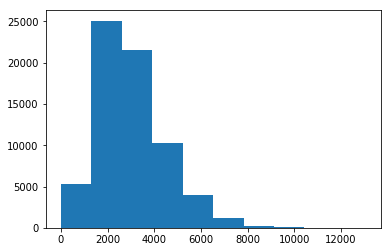

In [70]:
plt.hist(np.array(distances2))
np.percentile(np.array(distances2),95)

In [5]:
import importlib
import segment_cluster as sc
importlib.reload(sc)
all_outlier_segments=[]
for time_series in outlier_file[150:300]:
    valid_segments=sc.segmentation(time_series, 
                                seg_len=50, 
                                stride=1,
                                time_stamps=False)
    all_outlier_segments.append(valid_segments)
all_outlier_segments=np.vstack(all_outlier_segments)

In [82]:
distances_outlier = []
for segment in all_outlier_segments:
    neighbours = neigh.kneighbors(X=segment.reshape(1, -1), n_neighbors=2, return_distance=True)[0][0][-1]
    distances_outlier.append(neighbours)

2404.339648764838

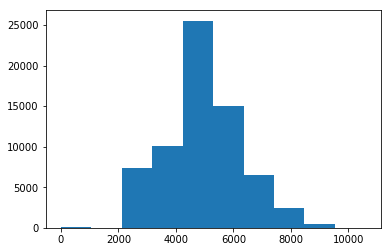

In [83]:
plt.hist(np.array(distances_outlier))
np.percentile(np.array(distances_outlier),1)

In [104]:
np.where(all_outlier_segments == 0)

(array([], dtype=int64), array([], dtype=int64))

In [105]:
all_outlier_segments

array([[3620.52249676, 3609.00640249, 3600.65573651, ..., 3603.41619761,
        3516.9611868 , 3768.57771111],
       [3609.00640249, 3600.65573651, 3607.16509319, ..., 3516.9611868 ,
        3768.57771111, 3628.74977808],
       [3600.65573651, 3607.16509319, 3607.86969363, ..., 3768.57771111,
        3628.74977808, 3798.12384904],
       ...,
       [5213.83179834, 4874.84756676, 5110.66179094, ..., 5107.62393126,
        5077.9840774 , 4953.35462437],
       [4874.84756676, 5110.66179094, 5036.63625973, ..., 5077.9840774 ,
        4953.35462437, 5198.67829672],
       [5110.66179094, 5036.63625973, 4966.87637443, ..., 4953.35462437,
        5198.67829672, 5256.60803425]])

In [ ]:
from sklearn.cluster import DBSCAN
eps_list = [2000, 3000, 4000, 5000, 6000, 7000]
samples_list = [1, 5, 10, 50, 100, 500, 1000]
for eps in eps_list:
    for min_s in samples_list:
        scan = DBSCAN(eps=eps, min_samples=min_s).fit(all_outlier_segments)
        print("eps= ", eps, "samples= ", min_s)
        print("noisy= ", len(np.where(scan.labels_ == -1)[0])/len(scan.labels_))
        print("classes= ", len(np.unique(scan.labels_)))
        print()

eps=  2000 samples=  1
noisy=  0.0
classes=  3117

eps=  2000 samples=  5
noisy=  0.008070953436807096
classes=  2983

eps=  2000 samples=  10
noisy=  0.18993348115299336
classes=  1447



In [ ]:
scan = DBSCAN(eps=eps, min_samples=min_s).fit(all_outlier_segments)
scan

In [114]:
eps=  1000 samples=  1
noisy=  0.0
classes=  60962

eps=  1000 samples=  5
noisy=  0.9350776053215077
classes=  52

eps=  1000 samples=  10
noisy=  0.9439467849223947
classes=  12

eps=  1000 samples=  50
noisy=  0.9597634885439763
classes=  8

eps=  2000 samples=  1
noisy=  0.0
classes=  3117

eps=  2000 samples=  5
noisy=  0.008070953436807096
classes=  2983

eps=  2000 samples=  10
noisy=  0.18993348115299336
classes=  1447



1

In [49]:
data=np.random.randint(1,7,200000)

np.mean(data)

3.499355

In [51]:
np.mean(data)/200000

1.7496775e-05

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
import scipy.stats as ss
from astropy.stats import sigma_clip as sc

def sline(m,x,c,yp):
    '''
    a straight line model used to find rise and decay rates
    '''
    y=(m*x)+c
    return y

def fit_sline(x,yp,sline):
    '''
    fits the straight line to the data using the otpimum parameters. Then plots the output
    '''
    yplot=[]

    params=opt.curve_fit(sline,x,yp,maxfev=1000000)
    mo=params[0][0]
    co=params[0][1]

    for i in x:
        yploti=(mo*i)+co
        yplot.append(yploti)
    plt.figure(figsize=(12,12))
    plt.plot(x,yp, marker='x',markersize=5,linestyle='None')
    plt.title('a straight line fit to slope against temperature')
    plt.plot(x,yplot)
    plt.show()
    print ss.chisquare(yp,f_exp=yplot)
    return mo,co

f=open(r'''E:\Summer placement 2019\data\rise2.txt ''')
#empty arrays for filling with data
t=[]
s=[]
#opening the file and separating the columns
for line in f:
    ti,si=line.split()
    t.append(float(ti))#x
    s.append(float(si))#y
f.close()
#calling the fit funtions to fit the data
sfilter=sc(s,sigma=3, masked=False)
fit_sline(t,sfilter,sline)
parameters=opt.curve_fit(t,sfilter)

SyntaxError: invalid syntax (<ipython-input-52-153173a40f32>, line 32)

In [9]:
%matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import importlib
import time
import datetime
import segment_cluster as sc
import pandas as pd
import os
import fnmatch
from scipy.stats import zscore
import fnmatch


importlib.reload(sc)
sys.stdout.flush()
np.random.seed(0)

k_clusters = [10, 50, 100, 200]
seg_lens = [10, 50, 100, 150, 200]

In [6]:
results_list = fnmatch.filter(os.listdir(os.getcwd()), "validation_results_2019-07-18*.csv")

In [21]:
def plot_time_series(ordinary_data, outlier_data):
    """
    Function plots example time series out of the training and outlier data sets.
    The synthesis process is random, so the first 5 time series are a random sample.
    """
    fig, axes = plt.subplots(nrows=5, ncols=1)
    for index, time_series in enumerate(ordinary_data[0:5]):
        axes[index].plot(time_series)
        axes[index].plot(outlier_data[index])
        axes[index].get_xaxis().set_visible(False)
    axes[-1].get_xaxis().set_visible(True)
    fig.tight_layout()
    fig.show()
    return

def visualise(results_file, dataset_index, rho_outlier = False, MSE=False):
    """
    Functon uses plot_time_series to show some examples. 
    It tabulates the F1 metrics for all of the tests conducted.
    It ouputs the top F1 values and the corresponding hyperparameter values.
    """
    summary = np.loadtxt(results_file.split(".")[0]+"/grid_search.csv", delimiter=',')
    outlier_data = np.loadtxt(outlier_datasets[dataset_index], delimiter=',')
    if rho_outlier == True:
        plot_time_series(outlier_data, rho_data)
        print_outliers = "rho"
        print_training = outlier_datasets[dataset_index]
    else:
        plot_time_series(rho_data, outlier_data)
        print_outliers = outlier_datasets[dataset_index]
        print_training = "rho"
    plt.show()
    valid_summary = pd.DataFrame(summary[1:,1:]/1000, 
                                  index=["K"+str(param) for param in summary[1:,0]], 
                                  columns=["Len"+str(param) for param in summary[0,1:]])
    if MSE == True:
        summary_MSE = np.loadtxt(results_file.split(".")[0]+"/grid_search_MSE.csv", delimiter=',')
        valid_summary_MSE = pd.DataFrame(summary_MSE[1:,1:]/1000, 
                                      index=["K"+str(param) for param in summary_MSE[1:,0]], 
                                      columns=["Len"+str(param) for param in summary_MSE[0,1:]])    
    
    print("file_names: {}\ntraining: {} \noutliers: {}".format(results_file,print_training, print_outliers))
    print("Standardised MSE")
    print(valid_summary.round(2))
    if MSE == True:
        print("Original MSE")
        print(valid_summary_MSE.round(2))
    print()
    
    #find the best set of hyperparameters
    top_val = valid_summary.max().max()
    top_vals_ind = np.where(valid_summary == top_val)
    top_list = []
    
    if MSE == True:
        top_val_MSE = valid_summary_MSE.max().max()
        top_vals_ind_MSE = np.where(valid_summary_MSE == top_val_MSE)

    for n, i in enumerate(top_vals_ind[0]):
        top_k = valid_summary.index.values[i]
        top_len = valid_summary.columns.values[top_vals_ind[1][n]]
        top_list.append(top_k+" "+top_len)
    top_list.append("MSE:")
    for n, i in enumerate(top_vals_ind_MSE[0]):
        top_k = valid_summary_MSE.index.values[i]
        top_len = valid_summary_MSE.columns.values[top_vals_ind_MSE[1][n]]
        top_list.append(top_k+" "+top_len)
    return top_val, top_list

In [10]:
def validation_and_analysis(ordinary_file, outlier_file, k_clusters, seg_lens):
    summary = sc.analyse(file_name, k_clusters, seg_lens, save_histograms=False, save_grid=True)

In [ ]:
def validation_and_analysis(ordinary_file, outlier_file, k_clusters, seg_lens):
    file_name, validation_results = sc.validate_algorithm(ordinary_file, outlier_file, k_clusters, seg_lens, save_results=True)
    #summary = sc.analyse(file_name, k_clusters, seg_lens, save_histograms=True, save_grid=True)

In [11]:
for results_file in results_list:
    sc.analyse(results_file, k_clusters, seg_lens, save_histograms=False, save_grid=True, MSE=True)

In [13]:
rho_outlier = "data/synthetic_rhos_v2.csv"

# datasets used, every item corresponds to one complete test of the algorithm
outlier_datasets = ["data/synthetic_flats.csv", 
                    "data/synthetic_boxes.csv", 
                    "data/synthetic_boxes_thick.csv", 
                    "data/synthetic_sines.csv", 
                    "data/synthetic_sines_low.csv", 
                    "data/synthetic_sines_long.csv", 
                    "data/synthetic_sines_short.csv", 
                    "data/synthetic_sines_low_long.csv", 
                    "data/synthetic_sines_low_short.csv",
                    "data/synthetic_flats.csv", 
                    "data/synthetic_boxes.csv", 
                    "data/synthetic_sines.csv"]

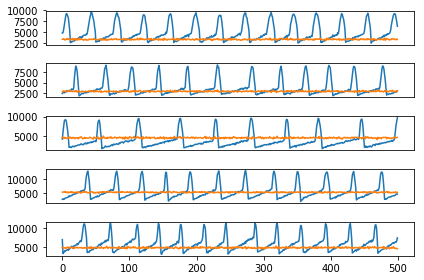

file_names: validation_results_2019-07-18_16-58-59.csv
training: rho 
outliers: data/synthetic_flats.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       1.0      1.0       1.0      0.04       0.0
K50.0       1.0      1.0       1.0      1.00       1.0
K100.0      1.0      1.0       1.0      1.00       1.0
K200.0      1.0      1.0       1.0      1.00       1.0
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       0.0      0.0       0.0       0.0       0.0
K50.0       0.0      0.0       0.0       0.0       0.0
K100.0      0.0      0.0       0.0       0.0       0.0
K200.0      0.0      0.0       0.0       0.0       0.0



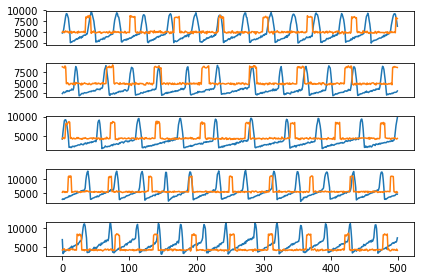

file_names: validation_results_2019-07-18_17-38-17.csv
training: rho 
outliers: data/synthetic_boxes.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.29     0.02      0.04      0.00      0.00
K50.0      0.48     0.35      0.17      0.16      0.12
K100.0     0.69     0.49      0.07      0.04      0.00
K200.0     1.00     0.76      0.35      0.11      0.02
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.02     0.02      0.02      0.00      0.00
K50.0      0.00     0.02      0.02      0.02      0.02
K100.0     0.03     0.03      0.02      0.02      0.02
K200.0     0.30     0.03      0.02      0.02      0.00



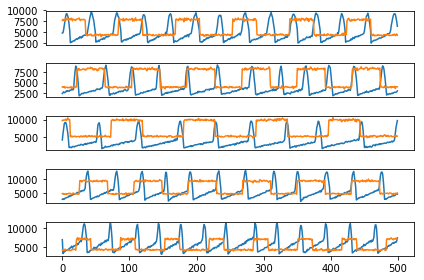

file_names: validation_results_2019-07-18_18-17-15.csv
training: rho 
outliers: data/synthetic_boxes_thick.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.37     0.25      0.61      0.00      0.05
K50.0      0.25     0.95      0.53      0.38      0.10
K100.0     0.47     0.98      0.27      0.16      0.02
K200.0     0.72     1.00      0.84      0.32      0.18
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.38     0.57      0.56      0.37      0.40
K50.0      0.30     0.70      0.51      0.48      0.37
K100.0     0.44     0.78      0.55      0.53      0.43
K200.0     0.72     0.79      0.67      0.54      0.42



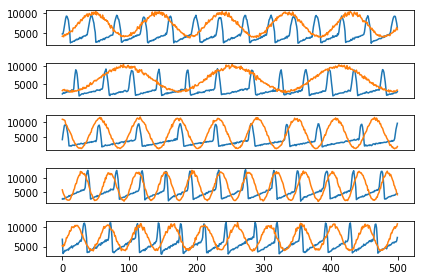

file_names: validation_results_2019-07-18_18-55-48.csv
training: rho 
outliers: data/synthetic_sines.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.13     0.00      0.11      0.00      0.06
K50.0      0.07     0.96      0.14      0.02      0.02
K100.0     0.44     1.00      0.09      0.02      0.02
K200.0     1.00     1.00      0.69      0.03      0.02
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.80     0.87      0.77      0.74      0.83
K50.0      0.75     1.00      0.84      0.79      0.69
K100.0     0.93     1.00      0.84      0.81      0.79
K200.0     0.98     1.00      0.89      0.90      0.75



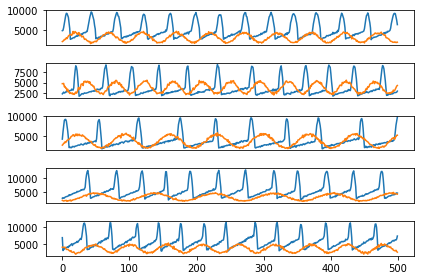

file_names: validation_results_2019-07-18_19-34-26.csv
training: rho 
outliers: data/synthetic_sines_low.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.12     0.53      0.17      0.10      0.02
K50.0      0.27     0.98      0.42      0.16      0.15
K100.0     0.71     1.00      0.52      0.33      0.02
K200.0     1.00     1.00      0.95      0.41      0.10
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.00      0.0       0.0       0.0       0.0
K50.0      0.00      0.0       0.0       0.0       0.0
K100.0     0.00      0.0       0.0       0.0       0.0
K200.0     0.02      0.0       0.0       0.0       0.0



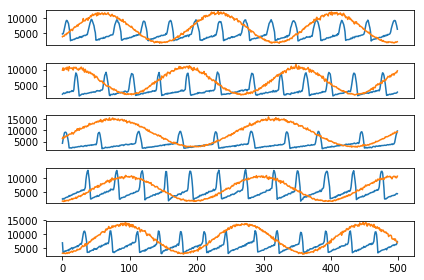

file_names: validation_results_2019-07-18_20-13-25.csv
training: rho 
outliers: data/synthetic_sines_long.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.19     0.04      0.74       0.0      0.00
K50.0      0.17     1.00      0.90       1.0      1.00
K100.0     0.33     0.97      0.76       1.0      0.97
K200.0     0.84     1.00      0.95       1.0      0.98
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.80     0.92      0.92      0.82      0.72
K50.0      0.68     0.98      0.96      0.95      0.93
K100.0     0.76     0.98      0.98      1.00      0.98
K200.0     0.90     0.98      0.98      1.00      1.00



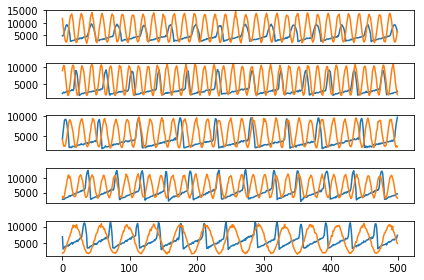

file_names: validation_results_2019-07-18_20-52-04.csv
training: rho 
outliers: data/synthetic_sines_short.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.06     0.46      0.40      0.00      0.00
K50.0      0.14     0.98      0.52      0.43      0.41
K100.0     0.26     1.00      0.63      0.39      0.35
K200.0     0.93     1.00      0.81      0.57      0.36
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.72     0.84      0.76      0.75      0.74
K50.0      0.74     0.96      0.79      0.72      0.70
K100.0     0.77     1.00      0.83      0.80      0.71
K200.0     1.00     1.00      0.91      0.86      0.80



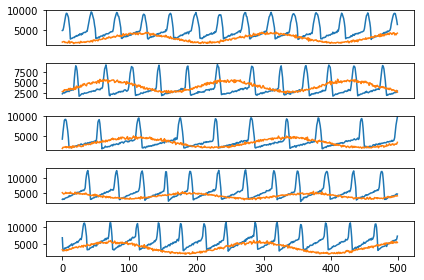

file_names: validation_results_2019-07-18_21-30-53.csv
training: rho 
outliers: data/synthetic_sines_low_long.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.07     0.57      0.73      0.13      0.00
K50.0      0.02     0.94      0.89      1.00      1.00
K100.0     0.09     0.85      0.79      0.96      0.95
K200.0     0.55     0.97      0.96      1.00      0.84
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       0.0      0.0       0.0       0.0       0.0
K50.0       0.0      0.0       0.0       0.0       0.0
K100.0      0.0      0.0       0.0       0.0       0.0
K200.0      0.0      0.0       0.0       0.0       0.0



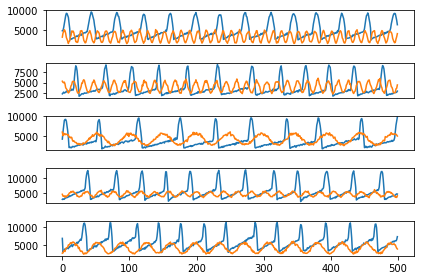

file_names: validation_results_2019-07-18_22-10-02.csv
training: rho 
outliers: data/synthetic_sines_low_short.csv
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.69     0.64      0.45      0.04      0.02
K50.0      0.84     0.98      0.69      0.51      0.41
K100.0     0.94     1.00      0.77      0.39      0.38
K200.0     1.00     1.00      0.91      0.62      0.34
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.00     0.00       0.0       0.0       0.0
K50.0      0.06     0.00       0.0       0.0       0.0
K100.0     0.06     0.00       0.0       0.0       0.0
K200.0     0.35     0.03       0.0       0.0       0.0



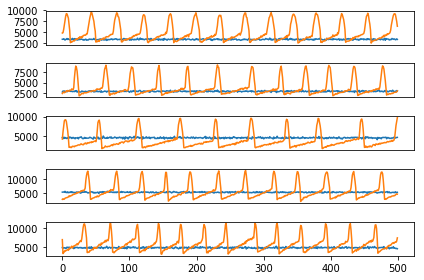

file_names: validation_results_2019-07-18_22-40-54.csv
training: data/synthetic_flats.csv 
outliers: rho
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       0.0     0.02      0.11      0.10      0.08
K50.0       0.0     0.00      0.00      0.04      0.04
K100.0      0.0     0.00      0.00      0.04      0.02
K200.0      0.0     0.04      0.00      0.00      0.00
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       1.0      1.0       1.0       1.0       1.0
K50.0       1.0      1.0       1.0       1.0       1.0
K100.0      1.0      1.0       1.0       1.0       1.0
K200.0      1.0      1.0       1.0       1.0       1.0



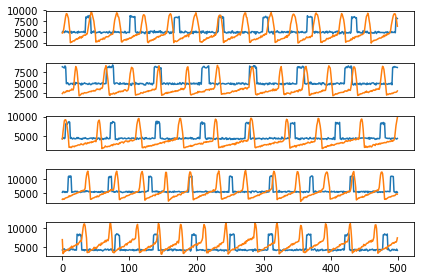

file_names: validation_results_2019-07-18_23-08-39.csv
training: data/synthetic_boxes.csv 
outliers: rho
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       0.0     0.02      0.02       0.0      0.04
K50.0       0.0     0.00      0.00       0.0      0.02
K100.0      0.0     0.00      0.00       0.0      0.00
K200.0      0.0     0.00      0.00       0.0      0.00
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.11     0.08      0.13      0.28      0.26
K50.0      0.25     0.25      0.24      0.28      0.29
K100.0     0.46     0.36      0.12      0.20      0.23
K200.0     0.75     0.50      0.14      0.13      0.12



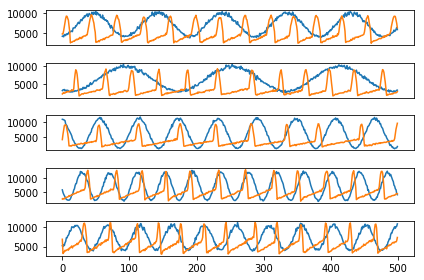

file_names: validation_results_2019-07-18_23-45-32.csv
training: data/synthetic_sines.csv 
outliers: rho
Standardised MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0       1.0      1.0      0.96      0.15      0.34
K50.0       1.0      1.0      1.00      1.00      1.00
K100.0      1.0      1.0      1.00      1.00      1.00
K200.0      1.0      1.0      1.00      1.00      1.00
Original MSE
        Len10.0  Len50.0  Len100.0  Len150.0  Len200.0
K10.0      0.00     0.00      0.14      0.09      0.04
K50.0      0.23     0.00      0.06      0.09      0.12
K100.0     0.42     0.00      0.16      0.12      0.12
K200.0     0.47     0.08      0.17      0.13      0.10

Training set:  rho Test set:  data/synthetic_flats.csv
Best F1:  1.0 Best hyperparameters: 
['K10.0 Len10.0', 'K10.0 Len50.0', 'K10.0 Len100.0', 'K50.0 Len10.0', 'K50.0 Len50.0', 'K50.0 Len100.0', 'K50.0 Len150.0', 'K50.0 Len200.0', 'K100.0 Len10.0', 'K100.0 Len50.0', 'K100.0 Len100.0', 'K100.0 Len150.0', 'K100.0

In [22]:
# how many tests were performed on the heartbeat when trained on the outlier data; these are at the end of outlier_datasets
no_of_reverse_tests = 3


results_files=[]
wd = "/export/data/jakubok/GRS1915+105/Clusters/timeseries_segment_clustering"

# find csv files with test results
for item in fnmatch.filter(os.listdir(wd), "validation_results_2019-07-18*.csv"):
    results_files.append(item)

results_files = np.sort(np.array(results_files))

rho_data = np.loadtxt(rho_outlier, delimiter=',')



results_summary = []
# visualise results for tests where the algorithm was trained on rho
for results_ind, results_file in enumerate(results_files[-len(outlier_datasets):-no_of_reverse_tests]):
    dataset_index = results_ind
    top_F1, top_params_list = visualise(results_file, results_ind, MSE=True)
    results_summary.append(("rho", outlier_datasets[dataset_index], top_F1, top_params_list))
# visualise results for tests where the algorithm was trained on a time series different from rho
for results_ind, results_file in enumerate(results_files[-no_of_reverse_tests:]):
    dataset_index = len(outlier_datasets) - no_of_reverse_tests + results_ind
    top_F1, top_params_list = visualise(results_file, dataset_index, rho_outlier = True, MSE=True)
    results_summary.append((outlier_datasets[dataset_index], "rho", top_F1, top_params_list))

for results in results_summary:
    print("Training set: ", results[0], "Test set: ", results[1])
    print("Best F1: ", results[2], "Best hyperparameters: ")
    print(results[3])
    print()

In [26]:
#train on flat, test against rho
tsscod = sc.TSSCOD(k_clusters = 50, seg_len = 100)
flat_data = np.loadtxt("data/synthetic_flats.csv", delimiter=',')
box_data = np.loadtxt("data/synthetic_boxes.csv", delimiter=',')
rho_data = np.loadtxt("data/synthetic_rhos_v2.csv", delimiter=',')


tsscod.train(rho_data[0:150], random_state = 0)

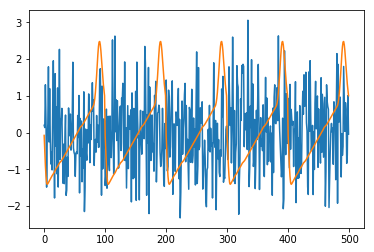

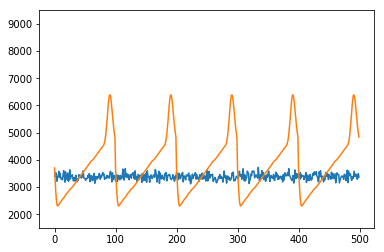

402665.0176298426
2.112557427162935
1296116.3079669962


/export/data/jakubok/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if sys.path[0] == '':


In [38]:
test_ts = flat_data[0]
reco = tsscod.reconstruct(test_ts, output = "reconstruction")
std_test  = zscore(test_ts)
std_reco = zscore(reco)
plt.plot(std_test)
plt.plot(std_reco)
plt.show()
plt.plot(test_ts)
plt.plot(reco)
plt.ylim([1500,9500])
plt.show()
distance, path = fastdtw(reco, test_ts, dist=2)
print(distance)
print(np.mean(((std_reco-std_test))**2.0))
print(np.mean(((reco-test_ts))**2.0))

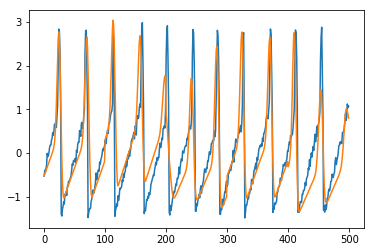

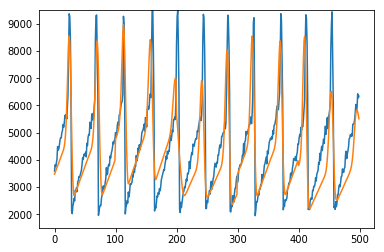

177331.73458683898
0.4654078705718232
1309732.0096212905


/export/data/jakubok/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if sys.path[0] == '':


In [39]:
test_ts = rho_data[159]
reco = tsscod.reconstruct(test_ts, output = "reconstruction")
std_test  = zscore(test_ts)
std_reco = zscore(reco)
plt.plot(std_test)
plt.plot(std_reco)
plt.show()
plt.plot(test_ts)
plt.plot(reco)
plt.ylim([1500,9500])
plt.show()
distance, path = fastdtw(reco, test_ts, dist=2)
print(distance)
print(np.mean(((std_reco-std_test))**2.0))
print(np.mean(((reco-test_ts))**2.0))

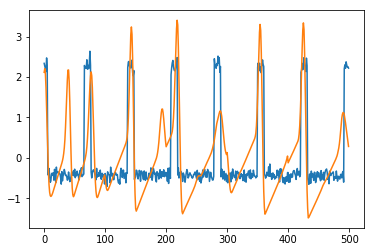

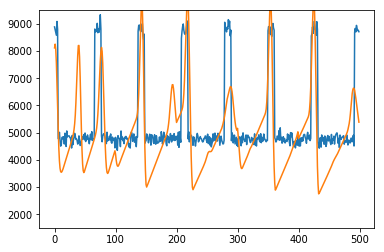

467526.82323046593
0.7712986274309228
1908824.6262860622


/export/data/jakubok/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if sys.path[0] == '':


In [40]:
test_ts = box_data[1]
reco = tsscod.reconstruct(test_ts, output = "reconstruction")
std_test  = zscore(test_ts)
std_reco = zscore(reco)
plt.plot(std_test)
plt.plot(std_reco)
plt.show()
plt.plot(test_ts)
plt.plot(reco)
plt.ylim([1500,9500])
plt.show()
distance, path = fastdtw(reco, test_ts, dist=2)
print(distance)
print(np.mean(((std_reco-std_test))**2.0))
print(np.mean(((reco-test_ts))**2.0))

In [24]:
np.dtype(float).type

numpy.float64